<a href="https://colab.research.google.com/github/DenVankov/Hakaton/blob/master/Endgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вступление
## Задача 15.
Ценообразование на рынке услуг. Интерфакс.
### Цель
Создать инструмент поиска и анализа факторов, оказывающих решающее влияние на ценнообразование на рынке предоставления услуг в рамках госзакупок.
### Постановка задачи
По сути задача заключается в том, чтобы с помощью алгоритма изучить тексты сотен тысяч договоров на оказание однотипной услуги, в качестве примера мы взяли таблицу закупок по теме питания.

#### Глобальная задача:

1. Выявить факторы, оказывающие максимальное влияние на цену контракта;

2. Определить вес каждого из выявленных факторов;

3. В целом по стране и по отдельным регионам

4. В динамике по годам

### Процесс выполнения

Скачав предложенную тестовую выборку, нужно было выделить гиперссылки на систему СПАРК-маркетинг. Затем, перейдя по ним, попасть в систему и получить файлы с договорами, однако нам не был предоставлен API сервиса, из-за чего вход и скачивание файлов пришлось делать вручную.


## Тестовая выборка


In [122]:
Print_table()

,Заказчик,ИНН,Стоимость (руб.),Реестровый номер,Сфера деятельности,Наименование публикации,Unnamed: 6,Unnamed: 7,Unnamed: 8,Поставщик,ИНН.1,Победитель,Стоимость (руб.).1,"Снижение на торгах,%"
0,МБОУ СОШ № 6 С УГЛУБЛЕННЫМ ИЗУЧЕНИЕМ ОТДЕЛЬНЫХ...,5.021011e+09,580050.0,902555,[ОКПД2 56.29] Услуги по обеспечению питанием п...,Оказание услуг по организации питания для учащ...,Московская область,Подольск,2019-10-17 19:04:06,NaN,NaN,NaN,NaN,NaN
1,"ФГБУ ""РОСДЕТЦЕНТР""",7.703411e+09,11500000.0,0173100003519000163,[ОКПД2 82.30] Услуги по организации конференци...,Оказание комплекса услуг по размещению участни...,Москва,Москва,2019-10-17 19:29:51,NaN,NaN,NaN,NaN,NaN
2,ОМВД РОССИИ ПО ЛАХДЕНПОХСКОМУ РАЙОНУ,1.012012e+09,560000.0,0106100004719000007,[ОКПД2 56.29] Услуги по обеспечению питанием п...,Оказание услуг по организации ежедневного (вкл...,Республика Карелия,Республика Карелия,2019-10-17 17:28:06,NaN,NaN,NaN,NaN,NaN
3,"КГБУЗ ""ЦРБ Г. ЗМЕИНОГОРСКА""",2.206001e+09,230637.0,0817200000319012538,[ОКПД2 17.23] Принадлежности канцелярские бума...,Поставка бланочной продукции в 2020 году для н...,Алтайский край,Змеиногорский район,2019-10-17 13:14:00,NaN,NaN,NaN,NaN,NaN
4,"МУ ""ЦГЗСР Г. ТУЛЫ""",7.106031e+09,1131010.0,0166300024719000934,[ОКПД2 56.21] Услуги по поставке продукции общ...,Оказание услуг по питанию спасателей,Тульская область,Тула,2019-10-17 17:57:00,NaN,NaN,NaN,NaN,NaN


## Таблица, которая содержит описание гиперссылки и саму ссылку на конкретные документы в сервисe СПАРК-маркетинг

In [123]:
Links()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).


,Description,Hyperlinks
0,Оказание услуг по организации питания для учащ...,https://www.spark-marketing.ru/Card/Lot/74410334
1,Оказание комплекса услуг по размещению участни...,https://www.spark-marketing.ru/Card/Lot/74417341
2,Оказание услуг по организации ежедневного (вкл...,https://www.spark-marketing.ru/Card/Lot/74413711
3,Поставка бланочной продукции в 2020 году для н...,https://www.spark-marketing.ru/Card/Lot/74406420
4,Оказание услуг по питанию спасателей,https://www.spark-marketing.ru/Card/Lot/74414761


Изучив договора мы выделили следующие типы файлов:

Структура файлов:

1. Извещение (хлеб, морепродукты, и т.д) 
2. Документация (Проект контракта)
3. Документация (ТЗ)
4. Извещение (Извещение)
5. Документация (НМЦК)
6. Извещение (Извещение "Название_мероприятия")
7. Документация (Форма договора)


Полезными из этих типов являются следующие: 1, 4, 5, 7. Остальные не подходят так как не содержат достаточно данных для анализа, в отличие от полезных. 




##От частного к общему 
Для того, чтобы проанализировать зависимость между различными факторами был проведен парсинг файлов предоставленных интерфаксом.
Выбраны файлы находящиееся по наименовании публикации: *(000)Товары, работы или услуги на сумму, не превышающую 100 тыс. руб. (п.4 ч.1 ст.93 Федерального закона №44-ФЗ)*

Было выясненно что стоимость зависит от даты начала оказания услуг, периода,  цены контракта.
Выявлены занчимости критериев узнавалось на основе линейной регресии с L1 регуляризацией.

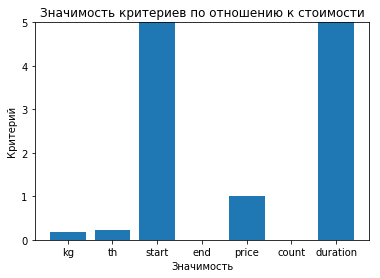

In [124]:
plot_graph()

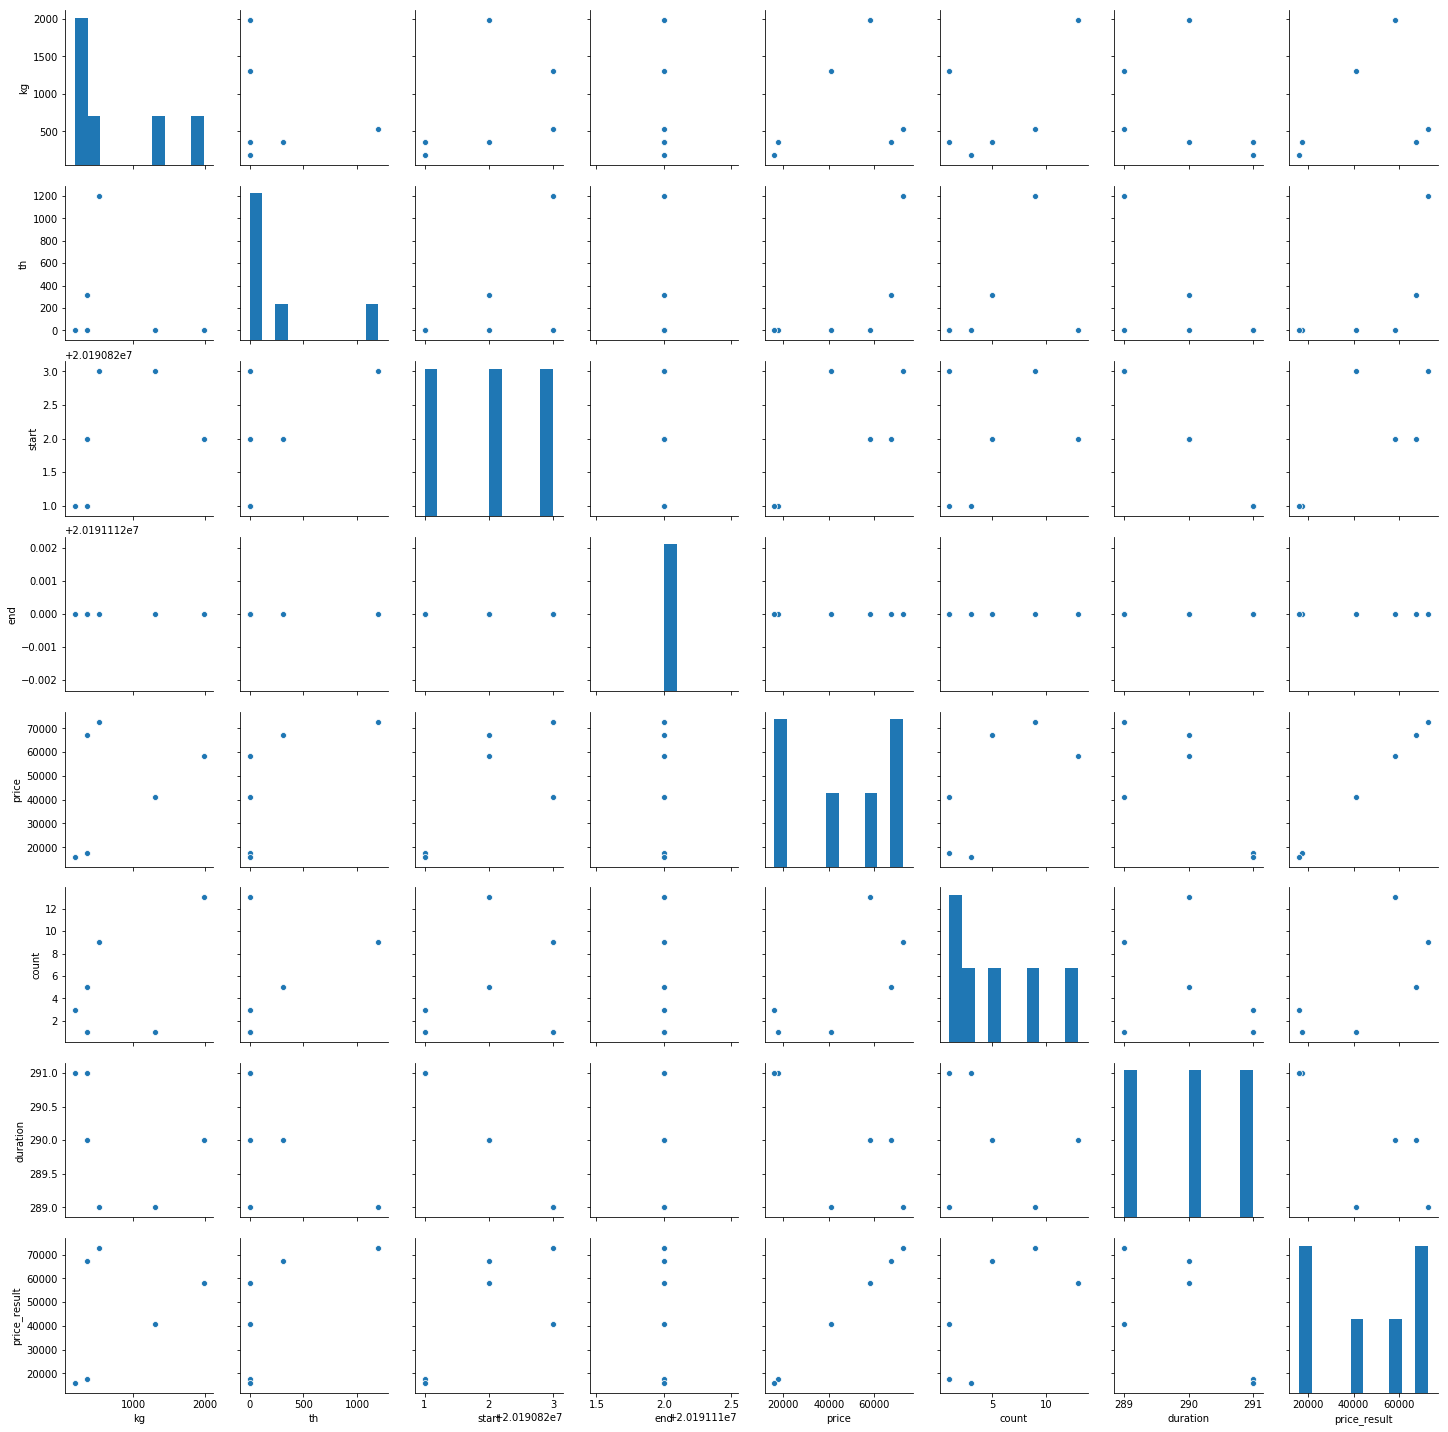

In [125]:
plot_corr()

##Переход к глобальному 
Для того, чтобы прогнозировать цену, которая будет следующей, нам необходимо выяснить зависимость, между факторами, характеризующими ee и самой ценой. Для решения данной задачи мы обучили математичекую модель, если говорить конкретней, нашели веса определенных факторов, влияющих на цену. В результате построения выяснилось, что основным фактором, имеющим наибольший вес является фактор под названием СТОИМОСТЬ (РУБ).1(Предложенная стоимость). Также, стоит отметить, что мы предположили, что зависимость между факторами и итоговой ценой является линейной, что следует из логики жизни. Таки образом, нами были получены все веса, которые относятся к каждому фактору ценообразования. А из этого следует факт возможности предсказать, с некоторой погрешностью следующую цену, имея какие-то из этих факторов, разумеется, чтобы цена была наиболее точной, учитывая погрешность модели, которую получили, следует задать все факторы, но необходимым же  считаем фактор СТОИМОСТЬ (РУБ).1.

###Таблица хэшей

In [136]:
hashing()

,Заказчик,ИНН,Стоимость (руб.),Реестровый номер,Сфера деятельности,Наименование публикации,Unnamed: 6,Unnamed: 7,Unnamed: 8,Поставщик,ИНН.1,Победитель,Стоимость (руб.).1,"Снижение на торгах,%"
0,-7774041251562145523,5.021011e+09,580050.0,-6558301013315618371,9174648632346033146,-3607015940464710759,-7595012753029027847,3190683785221342567,1017,0,0.0,0,0.0,0.0
1,5591792676049373081,7.703411e+09,11500000.0,8221980522572054032,7548060664383315531,3073793417115705675,3539675928818131621,3539675928818131621,1017,0,0.0,0,0.0,0.0
2,2173666551424219995,1.012012e+09,560000.0,4751316203754492496,9174648632346033146,-8693194748094030483,-1963490903784902872,-1963490903784902872,1017,0,0.0,0,0.0,0.0
3,3846686289517650086,2.206001e+09,230637.0,3139718556475211162,45335128055325547,-8113619732020179405,8456867984341806061,2113950874078410366,1017,0,0.0,0,0.0,0.0
4,7641017407220462462,7.106031e+09,1131010.0,-2385214731121146283,4132945279961610737,4620058288412997348,3845420492702503799,3415465814561450637,1017,0,0.0,0,0.0,0.0


Для обучения модели  решили учитывать все факторы. Но так как модель не работает со строковыми значениями, я их хэшировал.

###Таблица кореляций

In [137]:
show_corr()

,Заказчик,ИНН,Стоимость (руб.),Реестровый номер,Сфера деятельности,Наименование публикации,Unnamed: 6,Unnamed: 7,Unnamed: 8,Поставщик,ИНН.1,Победитель,Стоимость (руб.).1,"Снижение на торгах,%"
Заказчик,1.000000,0.020266,-0.004426,0.005367,-0.049125,0.005065,0.013204,-0.029224,0.002173,0.002995,-0.003814,0.003989,-0.000571,-0.021691
ИНН,0.020266,1.000000,0.019987,0.010249,-0.108492,0.013758,0.102519,0.127353,-0.022608,-0.019826,0.087390,-0.018285,-0.016619,0.015816
Стоимость\n(руб.),-0.004426,0.019987,1.000000,-0.011981,0.030360,0.006861,0.008294,0.006980,-0.010736,-0.022790,-0.023779,-0.017824,0.772832,0.000492
Реестровый номер,0.005367,0.010249,-0.011981,1.000000,0.019499,0.011511,0.011868,-0.011619,0.012709,0.005514,-0.000149,-0.005246,-0.011851,0.018708
Сфера деятельности,-0.049125,-0.108492,0.030360,0.019499,1.000000,0.042961,-0.115405,-0.082299,-0.029808,0.020432,0.020284,0.028942,0.025226,-0.006330
Наименование публикации,0.005065,0.013758,0.006861,0.011511,0.042961,1.000000,-0.011961,-0.032878,0.005894,-0.006130,0.008351,-0.005010,0.003828,0.007440
Unnamed: 6,0.013204,0.102519,0.008294,0.011868,-0.115405,-0.011961,1.000000,0.283756,-0.055706,-0.019974,0.037320,0.019932,0.011934,0.000988
Unnamed: 7,-0.029224,0.127353,0.006980,-0.011619,-0.082299,-0.032878,0.283756,1.000000,-0.009778,0.004110,0.027236,-0.002351,0.006345,0.010130
Unnamed: 8,0.002173,-0.022608,-0.010736,0.012709,-0.029808,0.005894,-0.055706,-0.009778,1.000000,0.010912,-0.016765,-0.066597,-0.032345,-0.009217
Поставщик,0.002995,-0.019826,-0.022790,0.005514,0.020432,-0.006130,-0.019974,0.004110,0.010912,1.000000,0.019382,0.026062,-0.024918,-0.006709


Посмотрим на корреляцию, здесь мы можем наглядно увидеть зависимости между итоговой стоимостью и остальными факторами.

###Коэфиценты в результате обучения линейной регрессией с L1 регуляризацией.
###Scores

In [138]:
show_error()

[-0.          0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.67282591
  0.        ]
MSE train: 5.029, test: 4.064
R^2 train: -4.060, test: -3.007


Здесь мы обучил математическую модель на отложенной выборке, то есть взяли первые 70% данных, нашели для них зависимость, определили веса каждого фактора, и сравнили насколько сильно отличаются ожидаемые значения, от тех, которые получились

Проанализировав тестовую выборку и выделив столбцы, которые возможно будут оказывать наибольшее влияние, построили графики зависимостей с помощью библиотеки *seaborn*.

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные графики для соответствующих пар признаков, то есть каждый с каждым.



###Зависимость стоимости от города. График - 1
###Корреляция по модулю. График - 2


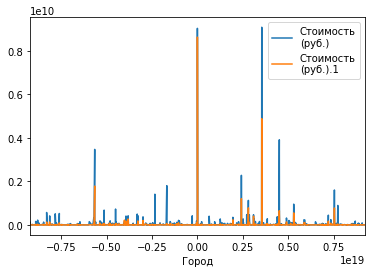

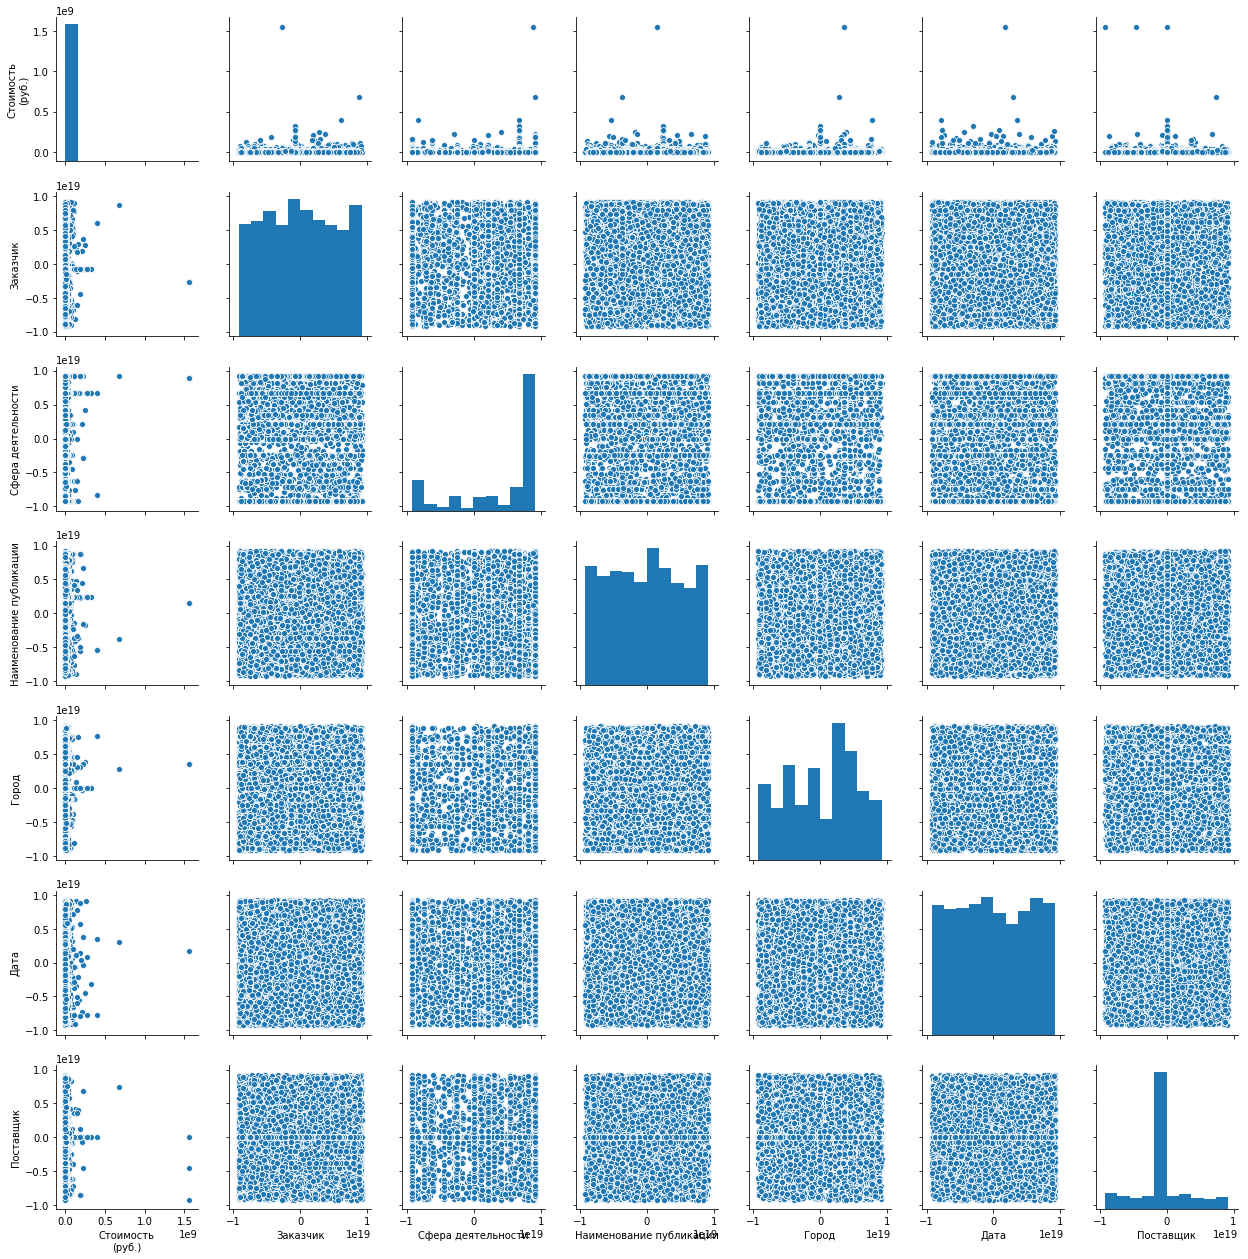

In [139]:
Graphics()

# Вывод
В результате исслеодваний были найдены зависимости.

Внешние зависимости:
1. Город
2. Наименование фирмы
3. Дата поставки
4. Предложенная стоимость контракта.

Были исследованны договора, для получения локальных зависисмостей. Выбрано наименование публикации: *"(000)Товары, работы или услуги на сумму, не превышающую 100 тыс. руб. (п.4 ч.1 ст.93 Федерального закона №44-ФЗ)"*

Локальные зависимости:
1. Продолжительнсоть контракта.
2. Дата подписания контракта.
3. Средняя цена контракта.
4. Количество продукта

Было примечательно, что от колличества вида фруктов, кондитерских изделий и т.п. стоимость не зависит. Значимо лишь колличесвто 

In [0]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook

data_pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)

def Print_table():
  return data_pit.head()

  
#Print_table()

def Links():
  wb = load_workbook('./xlsx/Закупки по теме питания.xlsx')
  
  def get_links(name):
    sheet = wb.get_sheet_by_name(name)
    maximum_row  = sheet.max_row
    hyper_links  = [''] *(maximum_row)
    name_publics = [''] *(maximum_row)
    strings =     [''] *(maximum_row)
    column = 'F'
  
    for i in range(3, maximum_row):
      tmp = column + str(i) 
      strings[i] = sheet[tmp].value
      parts = strings[i].rsplit('\"')
      res = parts[1]
    
      hyper_links[i] = res
      name_publics[i]= parts[3]

    data = pd.DataFrame({'Description': name_publics[3:], 'Hyperlinks': hyper_links[3:]})  
  
    return data

  data = get_links('Результаты поиска')
  return data.head()

#Links()


def Graphics():
  data_pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)
  data_pit = data_pit.fillna(0)
  data_pit['Заказчик'] = data_pit['Заказчик'].apply(hash)
  data_pit['Сфера деятельности'] = data_pit['Сфера деятельности'].apply(hash)
  data_pit['Наименование публикации'] = data_pit['Наименование публикации'].apply(hash)
  data_pit['Unnamed: 7'] = data_pit['Unnamed: 7'].apply(hash)
  data_pit['Unnamed: 8'] = data_pit['Unnamed: 8'].apply(hash)
  data_pit['Поставщик']  =  data_pit['Поставщик'].apply(hash)

  data_pit['Заказчик'] = data_pit.Заказчик.astype('float64')
  data_pit['Сфера деятельности'] = data_pit['Сфера деятельности'].astype('float64')
  data_pit['Наименование публикации'] = data_pit['Наименование публикации'].astype('float64')
  data_pit['Unnamed: 7'] = data_pit['Unnamed: 7'].astype('float64')
  data_pit['Unnamed: 8'] = data_pit['Unnamed: 8'].astype('float64')
  data_pit['Поставщик']  =  data_pit['Поставщик'].astype('float64')

  #print(data_pit.shape)

  data_pit = data_pit.rename(columns = {'Unnamed: 7' : 'Город', 'Unnamed: 8' : 'Дата'})


  useful_columns = ['Стоимость\n(руб.)', 'Заказчик', 'Сфера деятельности', 'Наименование публикации', 'Город', 'Дата', 'Поставщик']
  data_pit[useful_columns].head()


  sales_data = data_pit[[x for x in data_pit.columns if 'Стоимость\n(руб.)' in x] + ['Город']]
  sales_data.groupby('Город').sum().plot()


  sns_plot = sns.pairplot(data_pit[useful_columns])
  sns_plot.savefig('pairplot.png')

  
#Graphics()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 14)

pd.set_option('display.max_rows', 100)
pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)


In [0]:
def date(data):
  str_ = data.split('-')
  str__ = str_[2].split(' ')
  str_[2] = str__[0]
  str_.append(str__[1])
  str__ = str_[3].split(':')
  str_[3] = str__[0]
  str_.append(str__[1])
  str_.append(str__[2])
  num = int(str_[1])*100 + int(str_[2])
  return num


In [0]:
def hashing():
  pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)
  pit = pit.fillna(0)
  data_date = []
  for i in pit['Unnamed: 8']:
      data_date.append(date(str(i)))
  pit['Unnamed: 8'] = data_date
  for i in pit:
    if pit[i].dtype == 'object':
      pit[i] = pit[i].apply(hash)
  return pit.head()

In [0]:
def hashing_my(pit):
  pit = pit.fillna(0)
  data_date = []
  for i in pit['Unnamed: 8']:
      data_date.append(date(str(i)))
  pit['Unnamed: 8'] = data_date
  for i in pit:
    if pit[i].dtype == 'object':
      pit[i] = pit[i].apply(hash)
  return pit

In [0]:
def show_corr():
  pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)
  pit = hashing_my(pit)
  return pit.corr()

In [0]:
def func(df, linearmodel):
    ans = linearmodel.coef_[11]*df['Заказчик']
    for i in df.columns:
        ans += linearmodel.coef_[11]*df[i]
    ans += linearmodel.intercept_
    ans -= linearmodel.coef_[11]*df['Заказчик']
    answer = []
    for i in ans:
        answer.append(int(i))
    return answer

In [0]:
def show_error():
  pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)
  pit = hashing_my(pit)
  pit = (pit - pit.mean()) / pit.std()

  cost = pit['Стоимость\n(руб.)']
  pit = pit.drop('Стоимость\n(руб.)',axis=1)

  linearmodel = linear_model.Lasso(alpha=0.1)
  linearmodel.fit(pit,cost)
  print(linearmodel.coef_)
  
  df_train, df_test, y_train, y_test = train_test_split(
    pit, cost, test_size=0.3, random_state=10)
  y_train_pred = func(df_train, linearmodel)
  y_test_pred = func(df_test, linearmodel)
  print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
  print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso

!pip install docx2txt
def date_(data):
  str_ = data.split('–')[1]
  str_ = str_.replace(' ', '')
  str_ = str_.split('.') 
  int_ =int(str_[2][:-1])*10000 + int(str_[1])*100 + int(str_[0])
  return int_

import docx2txt
def parser(ind):
  file = docx2txt.process(f"./idx_docx/{ind}.docx")
  file = file.split('\n')
  i = 0
  kg = 0
  th = 0
  start = 0
  end = 0 
  period = 0
  price = 0
  count = 0
  while i < len(file):
    row = file[i]
    if  row == 'Объем поставки' :
      while row!= '' and i < len(file):
        i+=6
        count +=1
        row = file[i]
        row_split = row.split(' ')
        if row_split[1].find('шт')>-1:
          th += float(row_split[0])
        else: 
          kg += float(row_split[0])
        row = file[i+2]
    if row == 'Сроки поставки товаров, завершения работы, график оказания услуг.':
      i+=2
      row = file[i]
      start = date_(row)
      i+=2
      row = file[i]
      end = date(row)
    if row.find('\tНачальная (максимальная) цена договора:')>-1:
      str_ = row.split(' ')
      for s_ in str_:
        try:
          s_ = s_.replace(',', '.')
          price = float(s_)
          break
        except Exception:
          pass
    i+=1
  return kg, th, start, end, price,count

def file_parse():
  ind_s = [6821 , 6823 , 7001 , 7002 , 7275,  7279]
  kg_s, th_s, start_s, end_s, price_s, count_s = [],[],[],[],[],[]
  for ind in ind_s:
    kg, th, start, end, price, count = parser(ind)
    kg_s.append(kg)
    th_s.append(th)
    start_s.append(start)
    end_s.append(end)
    price_s.append(price);
    count_s.append(count)
  data_result = pd.DataFrame({
    'id': ind_s,
    'kg': kg_s,
    'th': th_s,
    'start': start_s,
    'end': end_s,
    'price':price_s,
    'count':count_s,
    'duration': np.array(end_s) - np.array(start_s)
   })
  data = pd.read_excel('./xlsx/Закупки по теме питания.xlsx',sheet_name=1,header = 1,hyperlinkparser = 'hyperlink')    
  stoimost = data['Стоимость\n(руб.)'].iloc[ind_s]
  return data_result, stoimost

def plot_graph():
  data_result, stoimost = file_parse()
  ls = Lasso(alpha=0.5)
  model = ls.fit(data_result.iloc[:,1:],stoimost)
  fig, ax1 = plt.subplots()
  ax1.bar(
       x = data_result.columns[1:],
      height=model.coef_
  )
  ax1.set_ylim(0,5)
  ax1.set_xlabel('Значимость')
  ax1.set_ylabel('Критерий')
  ax1.set_title('Значимость критериев по отношению к стоимости')
  print('')
  
def plot_corr():
  data_result, stoimost = file_parse()
  stoimost=pd.DataFrame({'price_result':stoimost.values})
  data_result = pd.concat([data_result,stoimost],axis=1)
  useful_columns = data_result.columns[1:]
  sns_plot = sns.pairplot(data_result[useful_columns])
def plot_corr_count():
  data_result, stoimost = file_parse()
  print(stoimost)

